In [1]:
#!pip install torchaudio
#!pip install pyloudnorm
#!pip install timbral_models

# Parametros Psicoacusticos

In [2]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
from IPython.display import Audio
import soundfile as sf
import librosa
import pyloudnorm as pyln
import timbral_models
import numpy as np
import matplotlib.pyplot as plt
from tools.plots import *

In [3]:
path_audio = 'audios/ref.wav'

In [4]:
SPEECH_WAVEFORM, SAMPLE_RATE = torchaudio.load(path_audio)

In [5]:
Audio(data=SPEECH_WAVEFORM, rate=SAMPLE_RATE)

## Espectrograma

In [6]:
n_fft = 1024
win_length = None
hop_length = 512


spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)

In [7]:
spec = spectrogram(SPEECH_WAVEFORM)

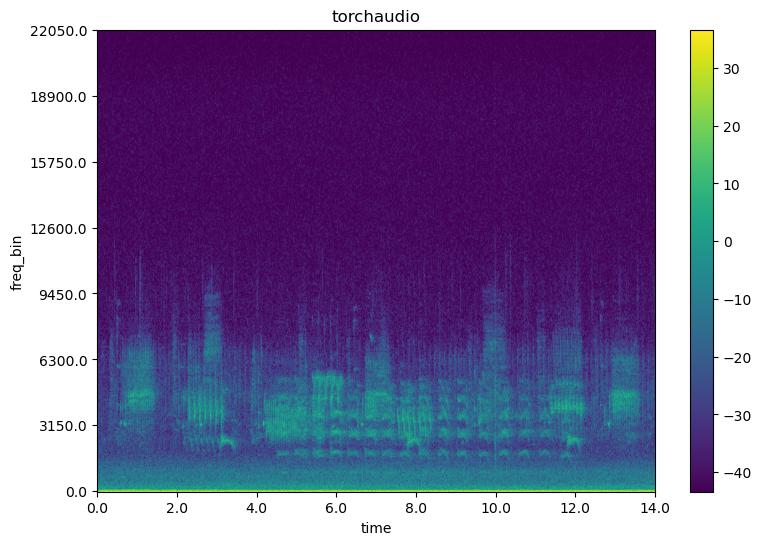

In [8]:
plot_spectrogram(spec[0],hop_length,SAMPLE_RATE, title="torchaudio")

## Pitch

In [9]:
pitch = F.detect_pitch_frequency(SPEECH_WAVEFORM, SAMPLE_RATE)

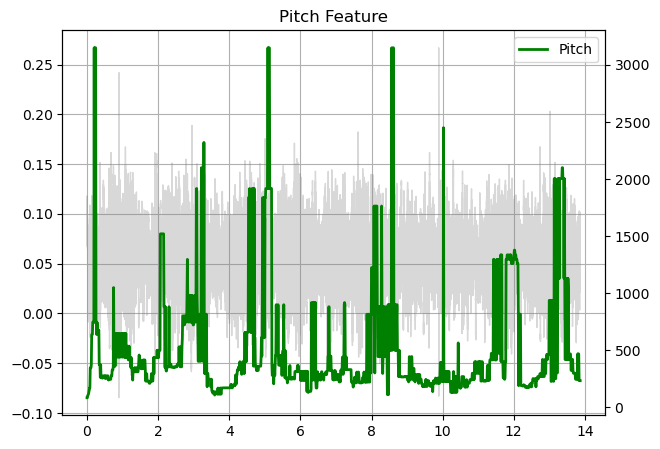

In [10]:
plot_pitch(SPEECH_WAVEFORM, SAMPLE_RATE, pitch)

## Loudness

### LUFS

In [11]:
data, rate = sf.read(path_audio) # load audio
timet = np.linspace(0,(len(data)-1)/rate,len(data))
# peak normalize audio to -1 dB
peak_normalized_audio = pyln.normalize.peak(data, -1.0)

# measure the loudness first 
meter = pyln.Meter(rate) # create BS.1770 meter
loudness = meter.integrated_loudness(data)
print("Loudness {}dB LUFS".format(round(loudness,1)))

Loudness -34.7dB LUFS


In [12]:
# loudness normalize audio to -12 dB LUFS
loud_norm = -12.0
loudness_normalized_audio = pyln.normalize.loudness(data, loudness, loud_norm)

/Users/diego/opt/miniconda3/envs/ACUS315/lib/python3.8/site-packages/pyloudnorm/normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")


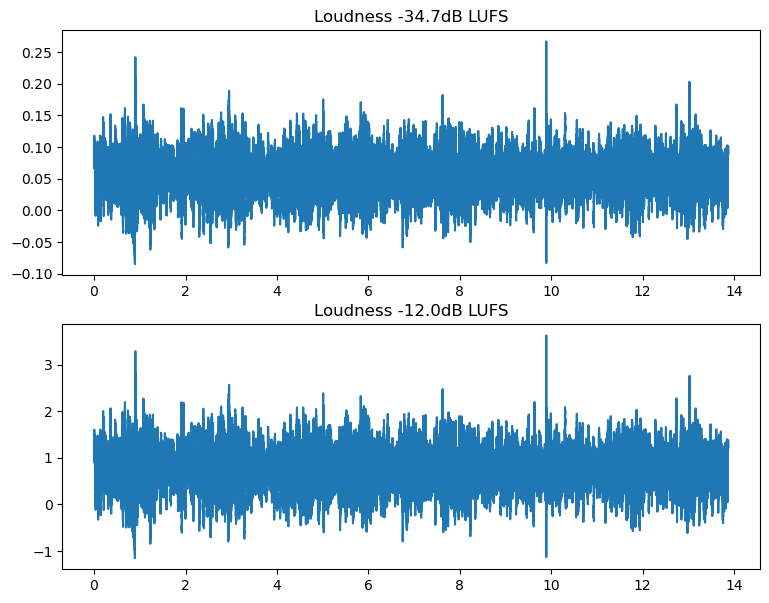

In [13]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(9,7))
ax[0].set_title("Loudness {}dB LUFS".format(round(loudness,1)))
ax[0].plot(timet, data)
ax[1].set_title("Loudness {}dB LUFS".format(loud_norm))
ax[1].plot(timet, loudness_normalized_audio);

## Roughness (Aspereza), Sharpness (Nitidez) y otros

In [14]:
timbre = timbral_models.timbral_extractor(path_audio)

Calculating hardness...
Calculating depth...
Calculating brightness...
Calculating roughness...
Calculating warmth...
Calculating sharpness...
Calculating boominess...
Calculating reverb...


In [15]:
timbre

{'hardness': 56.08506295100716,
 'depth': 69.04394649705723,
 'brightness': 73.47062894756773,
 'roughness': 49.10893121155942,
 'warmth': 48.41160356427996,
 'sharpness': 57.4295079204938,
 'boominess': 29.619350830943777,
 'reverb': 1}